**Hugo Riffaud de Turckheim : 3800256**
**Charline Curaut : 3810013**




# Practical work 2 : Fourier transform

This practial work is dedicated to the study of the discrete Fourier transform applied on the two following images:
![son.png](./img/son.png)
![sonrot.png](./img/sonrot.png)
and analyze the properties of their spectrum. To this end, we make use of the following functions provided by the module `numpy.fft`:

- `fft2()` to compute the Fourier transform on an image
- `fftshift()` to center the low frequencies
- `abs()` (from `numpy`) to compute the module of a complexe array

In most of cases, high frequencies have lower energy compare to low frequencies. We will use a logarithmic scale by applying $\log(1+abs(TF))$ to display the spectrum.

In [14]:
import numpy as np
from numpy.fft import fft2,fftshift
from PIL import Image
import matplotlib.pyplot as plt

son = np.array(Image.open('img/son.png'))
sonrot = np.array(Image.open('img/sonrot.png'))

## Exercice: properties of Fourier transform applied on natural images
1. Write the following functions:
 - `computeFT(I)` returning the Fourier transform of image `I`,
 - `toVisualizeFT(If)` returning the centered module of a complex array `If` (the Fourier transform of an image),
 - `toVisualizeLogFT(If)` similar to the previous function but use a logarithmic scale.

In [15]:
w,h=400,400

def computeFT(I):
    """ Array -> Array[complex] """
    return np.fft.fft2(I)

def toVisualizeFT(I,If):
    """ Array[complex] -> Array[float] """
    fig = plt.figure(constrained_layout=True,figsize=(w/40,h/40))
    axs = (fig
       .subplots(1, 3, sharex=True, sharey=True))
    axs[0].imshow(I,cmap='gray')
    axs[0].set_title('original image')
    axs[1].imshow(np.abs(np.fft.fftshift(If)),cmap='gray')
    axs[1].set_title('FFT')
    axs[2].imshow(np.log(1+np.abs(np.fft.fftshift(If))),cmap='magma')
    axs[2].set_title('Logarithmic FFT')




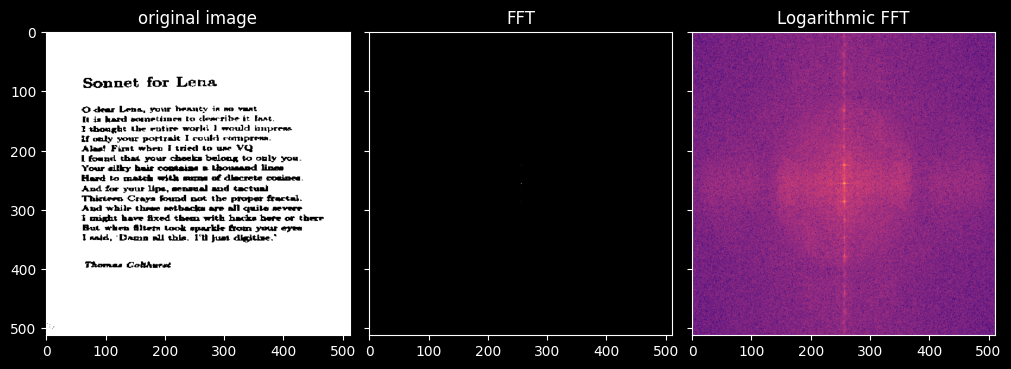

In [16]:
toVisualizeFT(son,computeFT(son))

2. Write a series of instructions that
 - compute the Fourier transform of `son` and `sonrot`,
 - compute and display the module using a logarithmic scale,
 - threshold the module with a parameter of $1.10^5$ (use the function of TME1)
 - display the thresholded spectrum

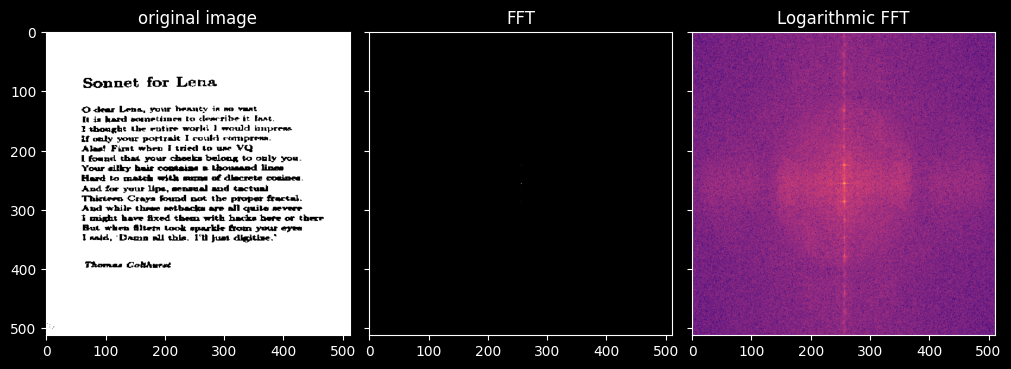

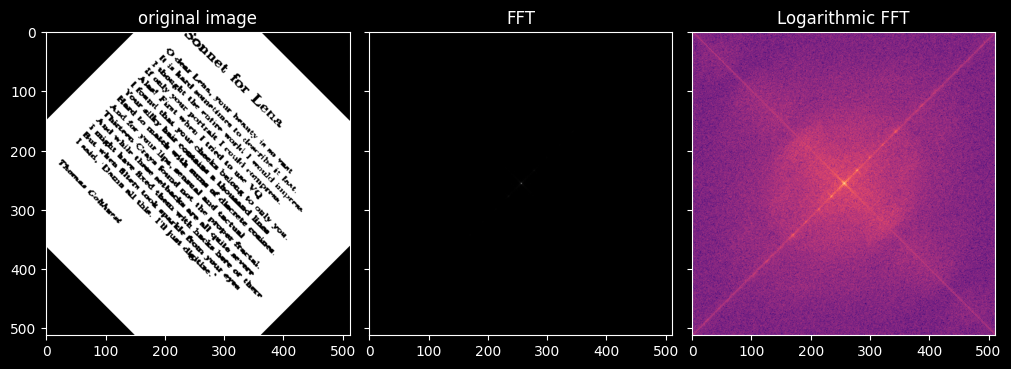

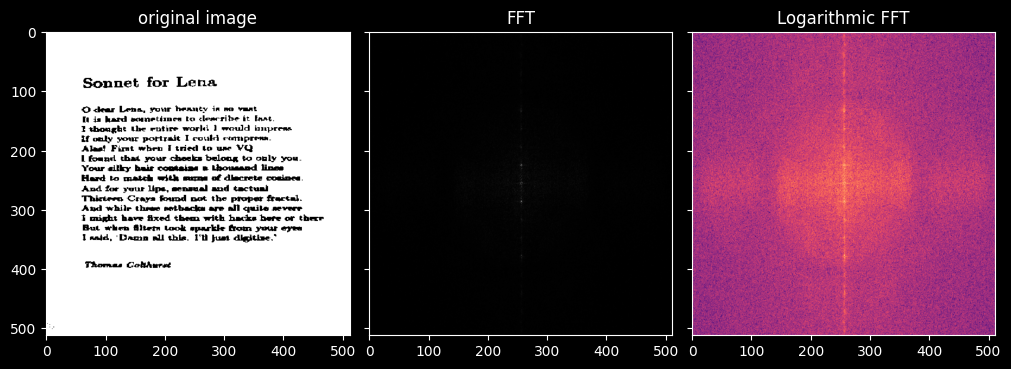

In [35]:
def thresholdImage(I,s):
    """ Array*int -> Array """
    return np.where(I<s,I,s)

def thresholdImageMin(I,s):
    """ Array*int -> Array """
    return np.where(I>s,I,0)


ftson=computeFT(son)
ftsonrot=computeFT(sonrot)

toVisualizeFT(son,ftson)
toVisualizeFT(sonrot,ftsonrot)
toVisualizeFT(son,thresholdImage(ftson,1e5))


3. Interpretation: discuss the results obtained on thresholded FT module. What property of the Fourier transform is shown ?

On peut voir qu'il y a beaucoup plus de petites fréquences que de hautes fréquences (le treshold a permis de supprimer les fréquences trop hautes et faire apparaitre les petites sur le plot)


4. Write the function `blend()` getting two images, one float parameter $\alpha\in[0,1]$, calculating $\alpha I_1+(1-\alpha)I_2$ and returning the result. 

In [19]:
def blend(I1,I2,alpha):
    """ Array**2*float -> Array """
    return (alpha * I1) + ((1-alpha) * I2)


Text(0.5, 1.0, 'blend son and sonrot')

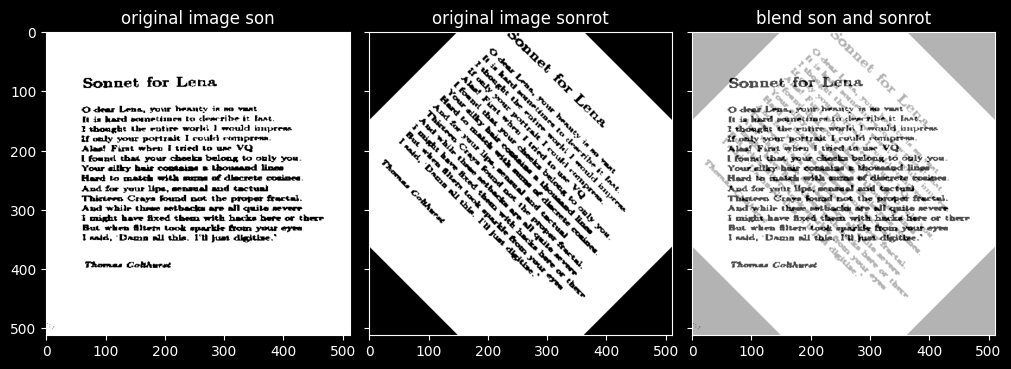

In [20]:
fig = plt.figure(constrained_layout=True,figsize=(w/40,h/40))
axs = (fig
    .subplots(1, 3, sharex=True, sharey=True))
axs[0].imshow(son,cmap='gray')
axs[0].set_title('original image son')
axs[1].imshow(sonrot,cmap='gray')
axs[1].set_title('original image sonrot')
axs[2].imshow(blend(son, sonrot, 0.7),cmap='gray')
axs[2].set_title('blend son and sonrot')

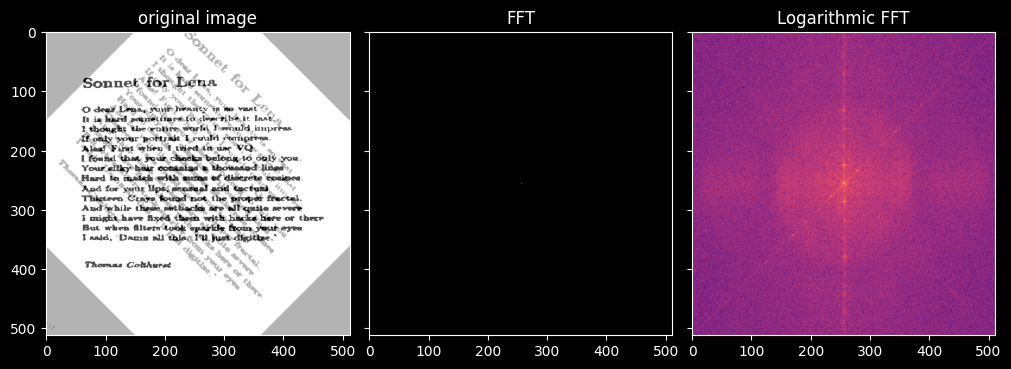

In [21]:
toVisualizeFT(blend(son, sonrot, 0.7),computeFT(blend(son, sonrot, 0.7)))

5. Apply the previous function on images `son` and `sonrot` and $\alpha=\frac12$, compute the Fourier transform, threshold the module and visualize the result. 

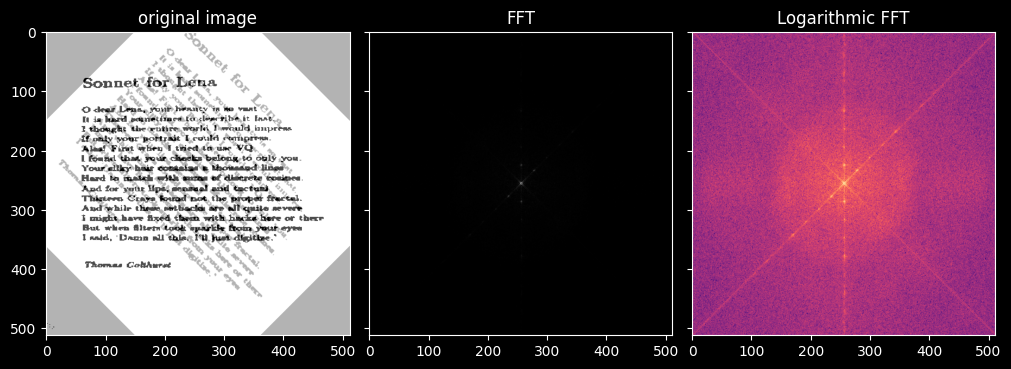

In [22]:
toVisualizeFT(blend(son, sonrot, 0.7),thresholdImage(computeFT(blend(son, sonrot, 0.5)),1e6))

6. Compare the latter result with those of question 2: what property of the Fourier transform is shown? What is the behaviour of $\alpha$ in the resulting spectrum?

On peut remarquer plusieurs choses. 

-Le plot de la FT de l'image avec les deux textes l'un sur l'autre coincide avec la supperpositions de deux plots FT correspondants. Ceci est au fait que la FT est une application linéaire. 
En effet si f est est une application linéaire alors (avec $ u,v \in E^2$  et  $\lambda \theta \in \R^2$): $$f(\lambda u+ \theta v) =\lambda f(u) + \theta f(v) $$ 

-$\alpha$ permet de mettre plus ou moins en avant l'une des deux images sur l'autre et donc faire plus ou moins aparaître la TF correspondant sur le plot correspondant

7. We want to determine the text orientation in image `sonrot` and produce a new image with horizontal text. Write the function `rectifyOrientation()` that:

 + computes the FT module of image given in parameter and threshold it at $3\times 10^{5}$,
 + from thresholded module determines the main orientation using the function `mainOrientation()` 
 + produces the rectified image applying a rotation with a suitable angle using `rotateImage()`

In [51]:
def mainOrientation(I):
    """ Array -> tuple[Iori,float]
        return image of orientation (32 bins) and the main orientation (degree) from a Fourier transform module
    """
    n, m = I.shape

    size = 256
    x = np.array(range(size))
    ori = np.vstack((np.cos(np.pi*x/size), np.sin(np.pi*x/size))).T

    Iori = np.zeros((n, m))
    orients = np.zeros((size))

    for i in range(1,n+1):
        for j in range(1,m+1):
            if I[i-1, j-1] > 0:
                v = np.array([j-m/2, -i + n/2])
                if i > n/2:
                    v = -v
                    prod = np.matmul(ori, v)
                    maxi = prod.max()
                    if maxi > 0:
                        imax = np.nonzero(prod == maxi)
                        Iori[i-1, j-1] = imax[0]
                        orients[imax] += 1

    maxori = np.nonzero(orients == orients.max())[0][0]
    return (Iori, 180*maxori/size - 90)

def rotateImage(I,a):
    """ Array*float -> Array 
        return a rotation of angle a (degree) of image I
    """
    return np.array(Image.fromarray(I).rotate(a, expand=True, fillcolor=127))

def rectifyOrientation(I):

    test =thresholdImage( np.absolute( np.fft.fftshift(computeFT(I)) ),3e5)

    degofrot=mainOrientation(test)[1]
    print(degofrot)
    return rotateImage(I,degofrot)



45.0


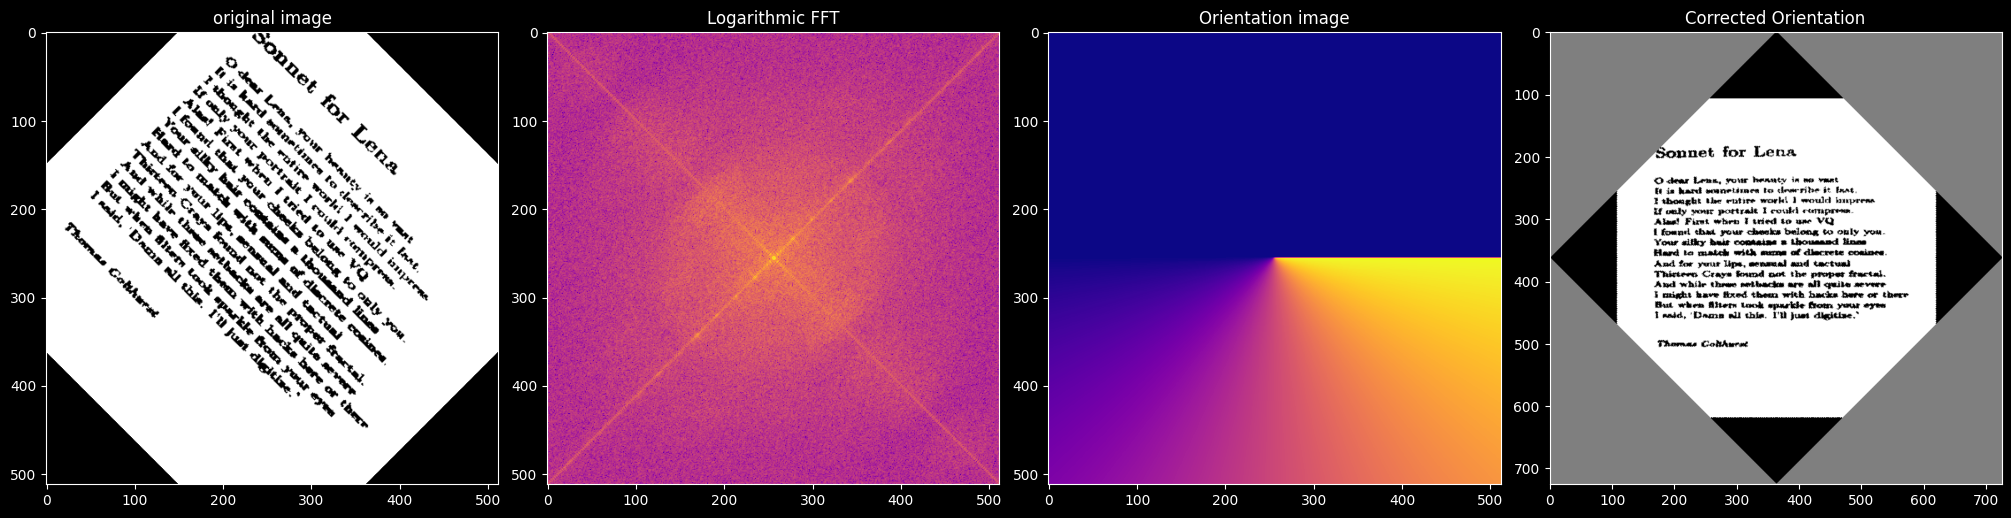

In [52]:
def visualizeCorrectOrientation(I):
    fig = plt.figure(constrained_layout=True,figsize=(w/20,h/20))
    axs = (fig
       .subplots(1, 4, sharex=False, sharey=False))



    axs[0].imshow(I,cmap='gray')
    axs[0].set_title('original image')

    FTI=np.absolute(thresholdImage(np.fft.fftshift(computeFT(I)),3e5))
    axs[1].imshow(np.log(1+FTI),cmap='plasma')
    axs[1].set_title('Logarithmic FFT')
    axs[2].imshow(mainOrientation(FTI)[0],cmap='plasma')
    axs[2].set_title('Orientation image')
    axs[3].imshow(rectifyOrientation(I),cmap='gray')
    axs[3].set_title('Corrected Orientation')
    
    
visualizeCorrectOrientation(sonrot)

8. Experiment `rectifyOrientation()` on `sinrot`, and on a rotation of `img/port.jpg` (using `rotateImage()`) with various rotation angles.  

45.0
45.0


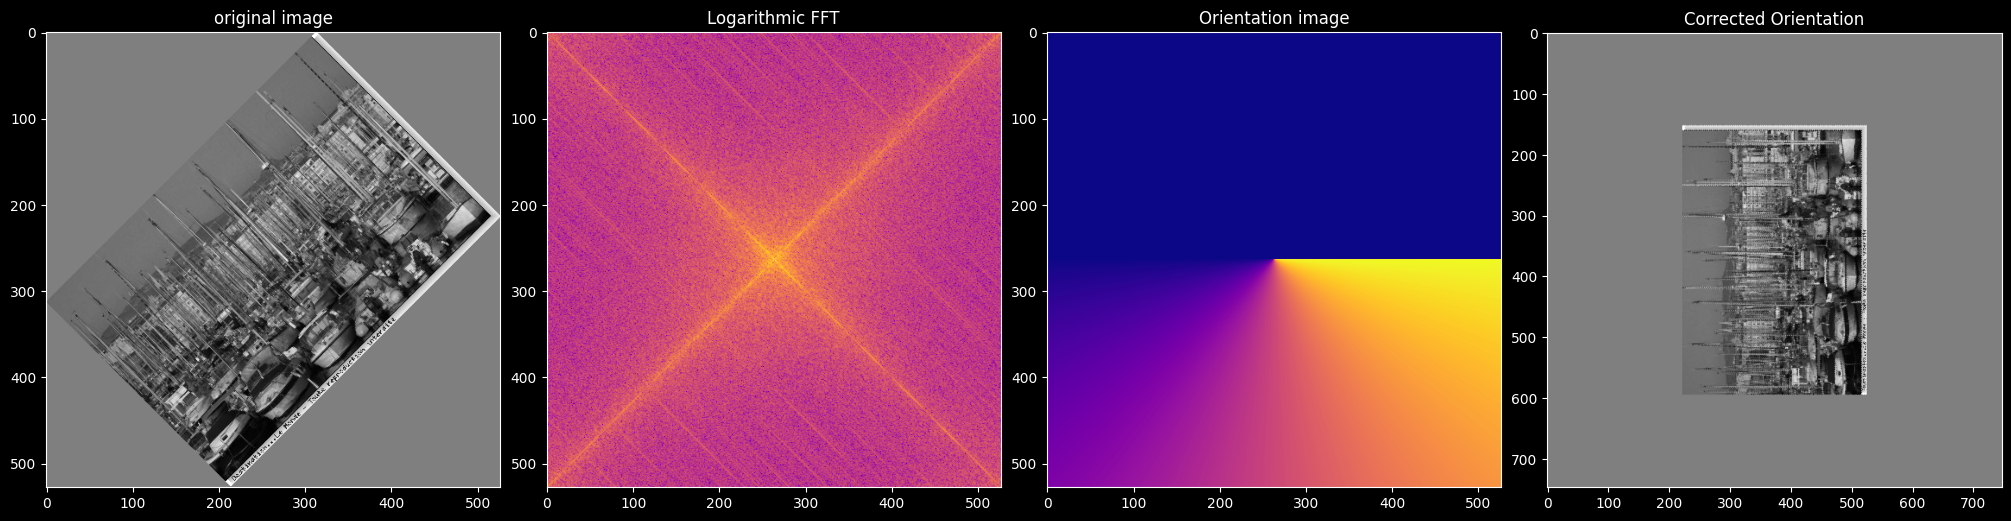

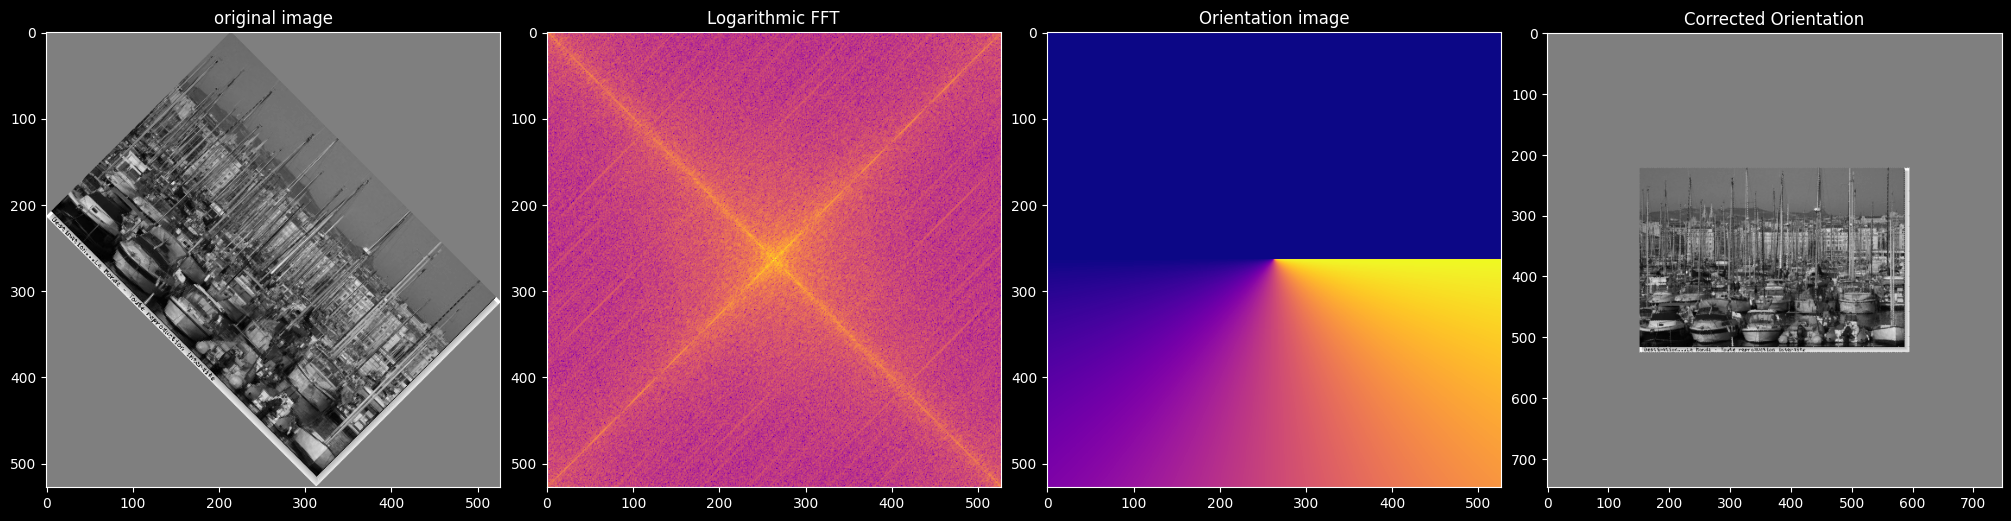

In [53]:
port = np.array(Image.open('img/port.jpg'))
sonrot2 = np.array(Image.open('img/sonrot2.png'))
visualizeCorrectOrientation(rotateImage(port,45))
visualizeCorrectOrientation(rotateImage(port,-45))
    
